In [1]:
!pip install ultralytics

In [2]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.5/112.6 GB disk)


In [3]:
from ultralytics import YOLO
from IPython.display import display, Image



In [4]:
!pip install roboflow



In [15]:



from roboflow import Roboflow
rf = Roboflow(api_key="0d7KpuvCrgiOyGhCJdeS")
project = rf.workspace("siabar").project("ppe-dataset-for-workplace-safety")
version = project.version(2)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to PPE-Dataset-for-Workplace-Safety-2 in yolov11:: 100%|██████████| 3238/3238 [00:00<00:00, 6175.20it/s]


In [16]:
dataset.location

'/content/PPE-Dataset-for-Workplace-Safety-2'

# Train Yolo11 on Custom Data now

In [17]:
!yolo task=detect mode=train model="yolo11n.pt" data={dataset.location}/data.yaml epochs=50 imgsz=640

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/PPE-Dataset-for-Workplace-Safety-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspecti

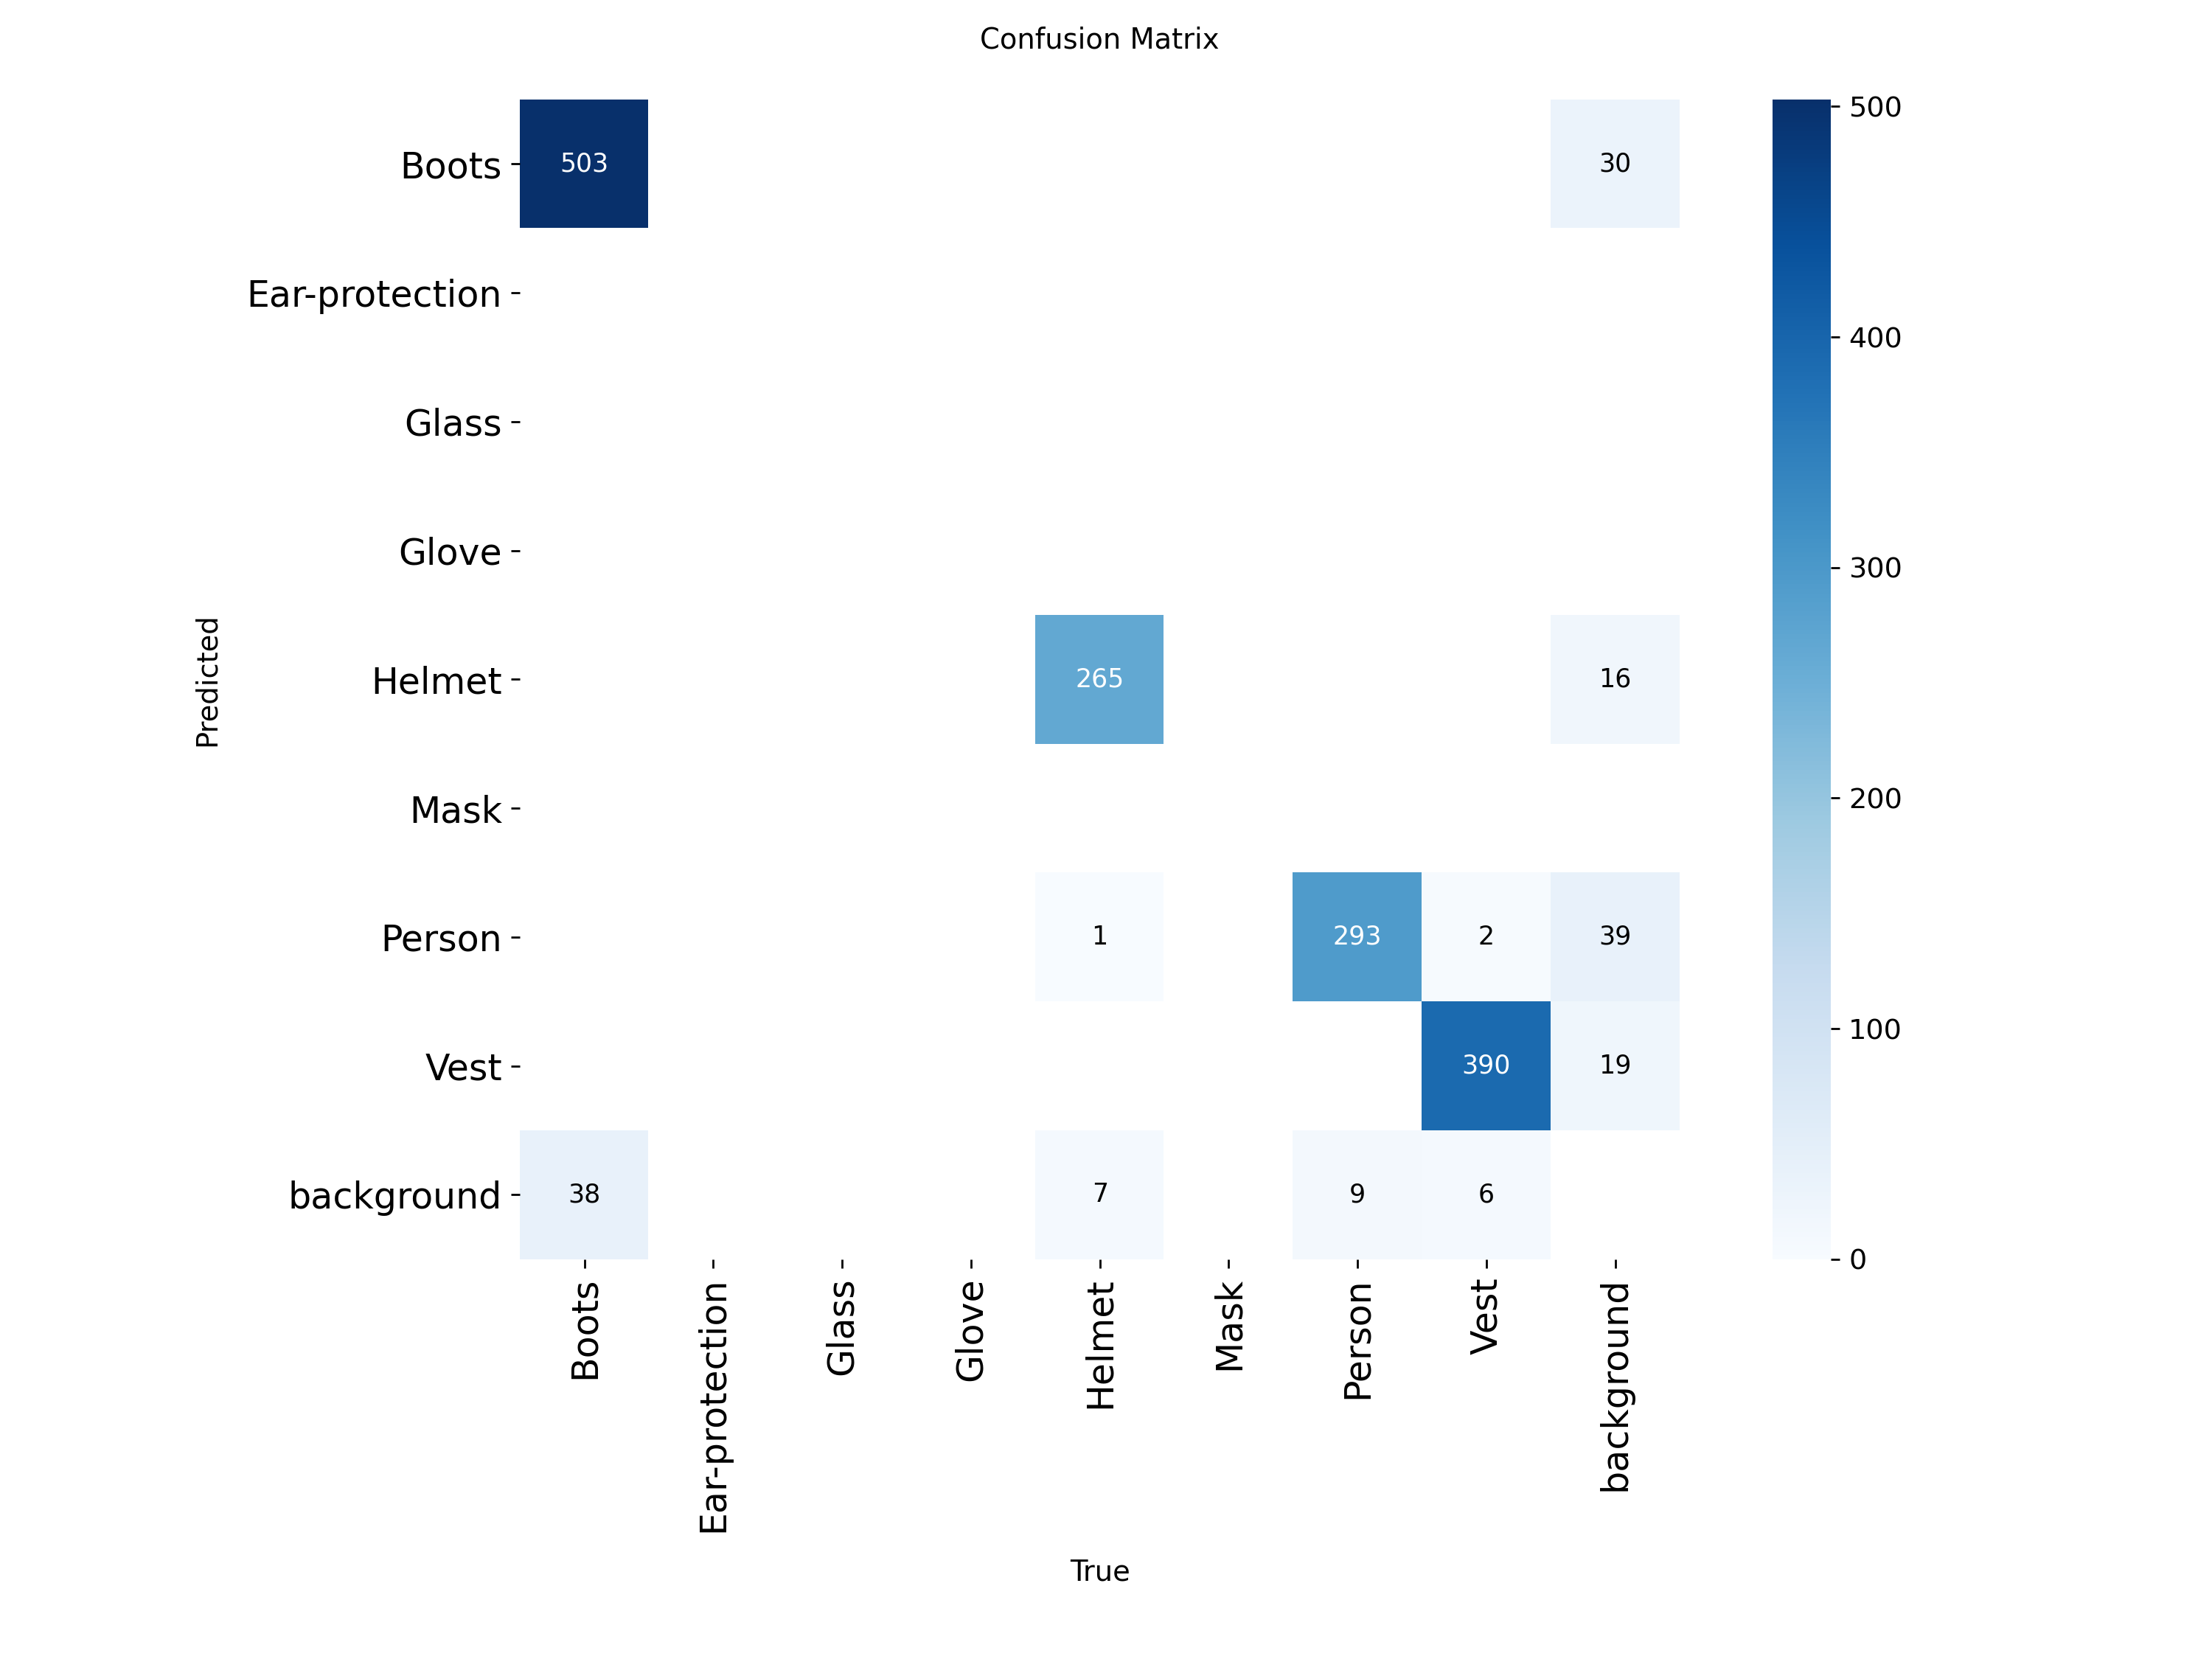

In [19]:
Image("/content/runs/detect/train2/confusion_matrix.png",width=800)

## Confusion Matrix   

The Confusion matrix shows model make some wrong predictions especially for Boots and 38 times it predicted it as a Background. 7 Times helmet is predicted as background and person only once. The Model Predicts person as background 9 times, Vest as Background 6 times and person 2 times. We can see a variation in wrong prediction for Background where 19 times it predicted a vest, 39 times a person and Finally 30 times a Boot.

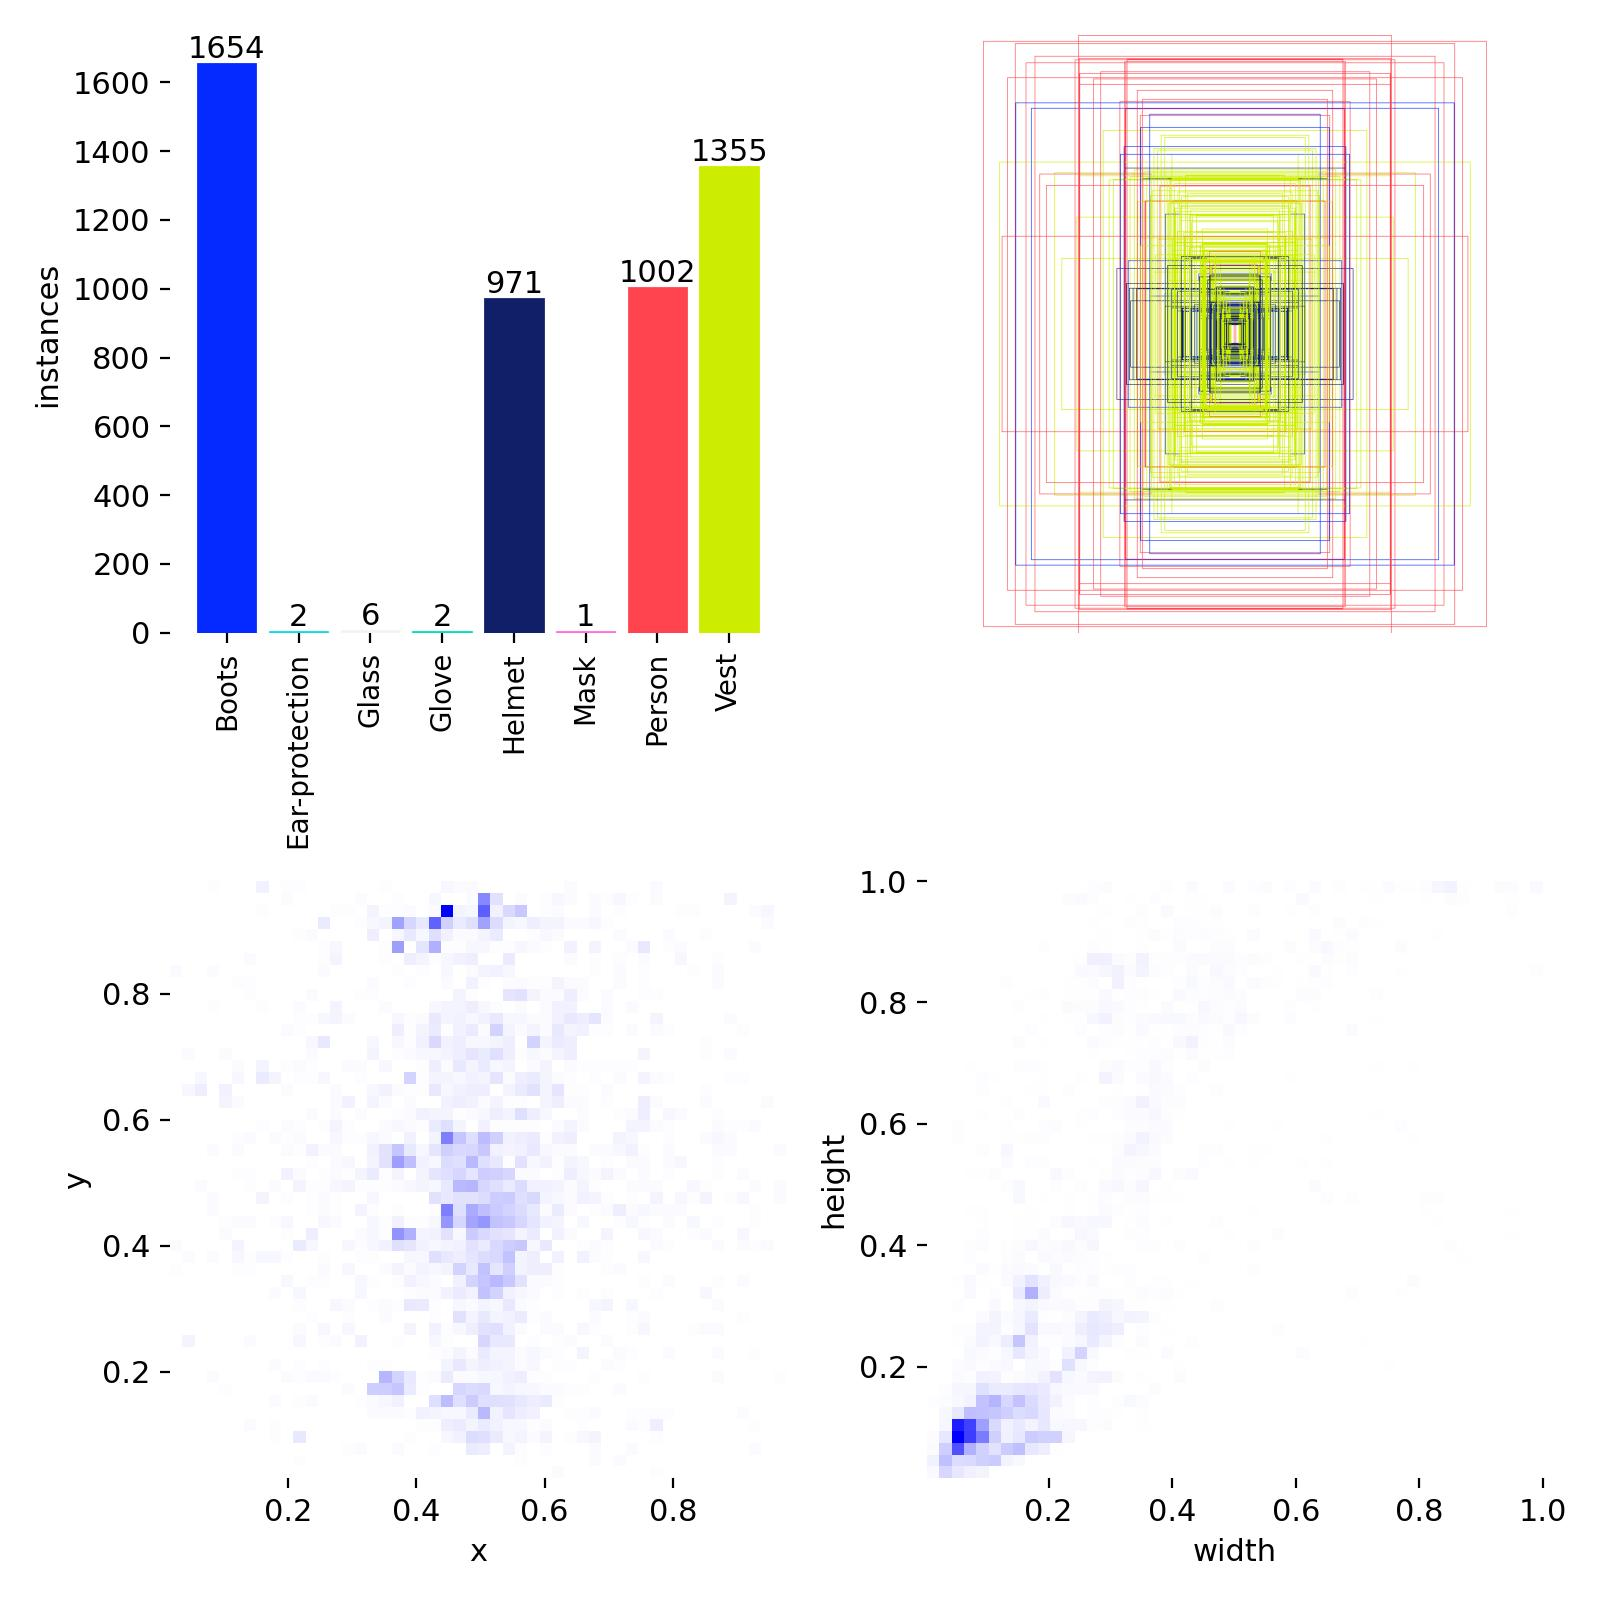

In [20]:
Image("/content/runs/detect/train2/labels.jpg",width=600)

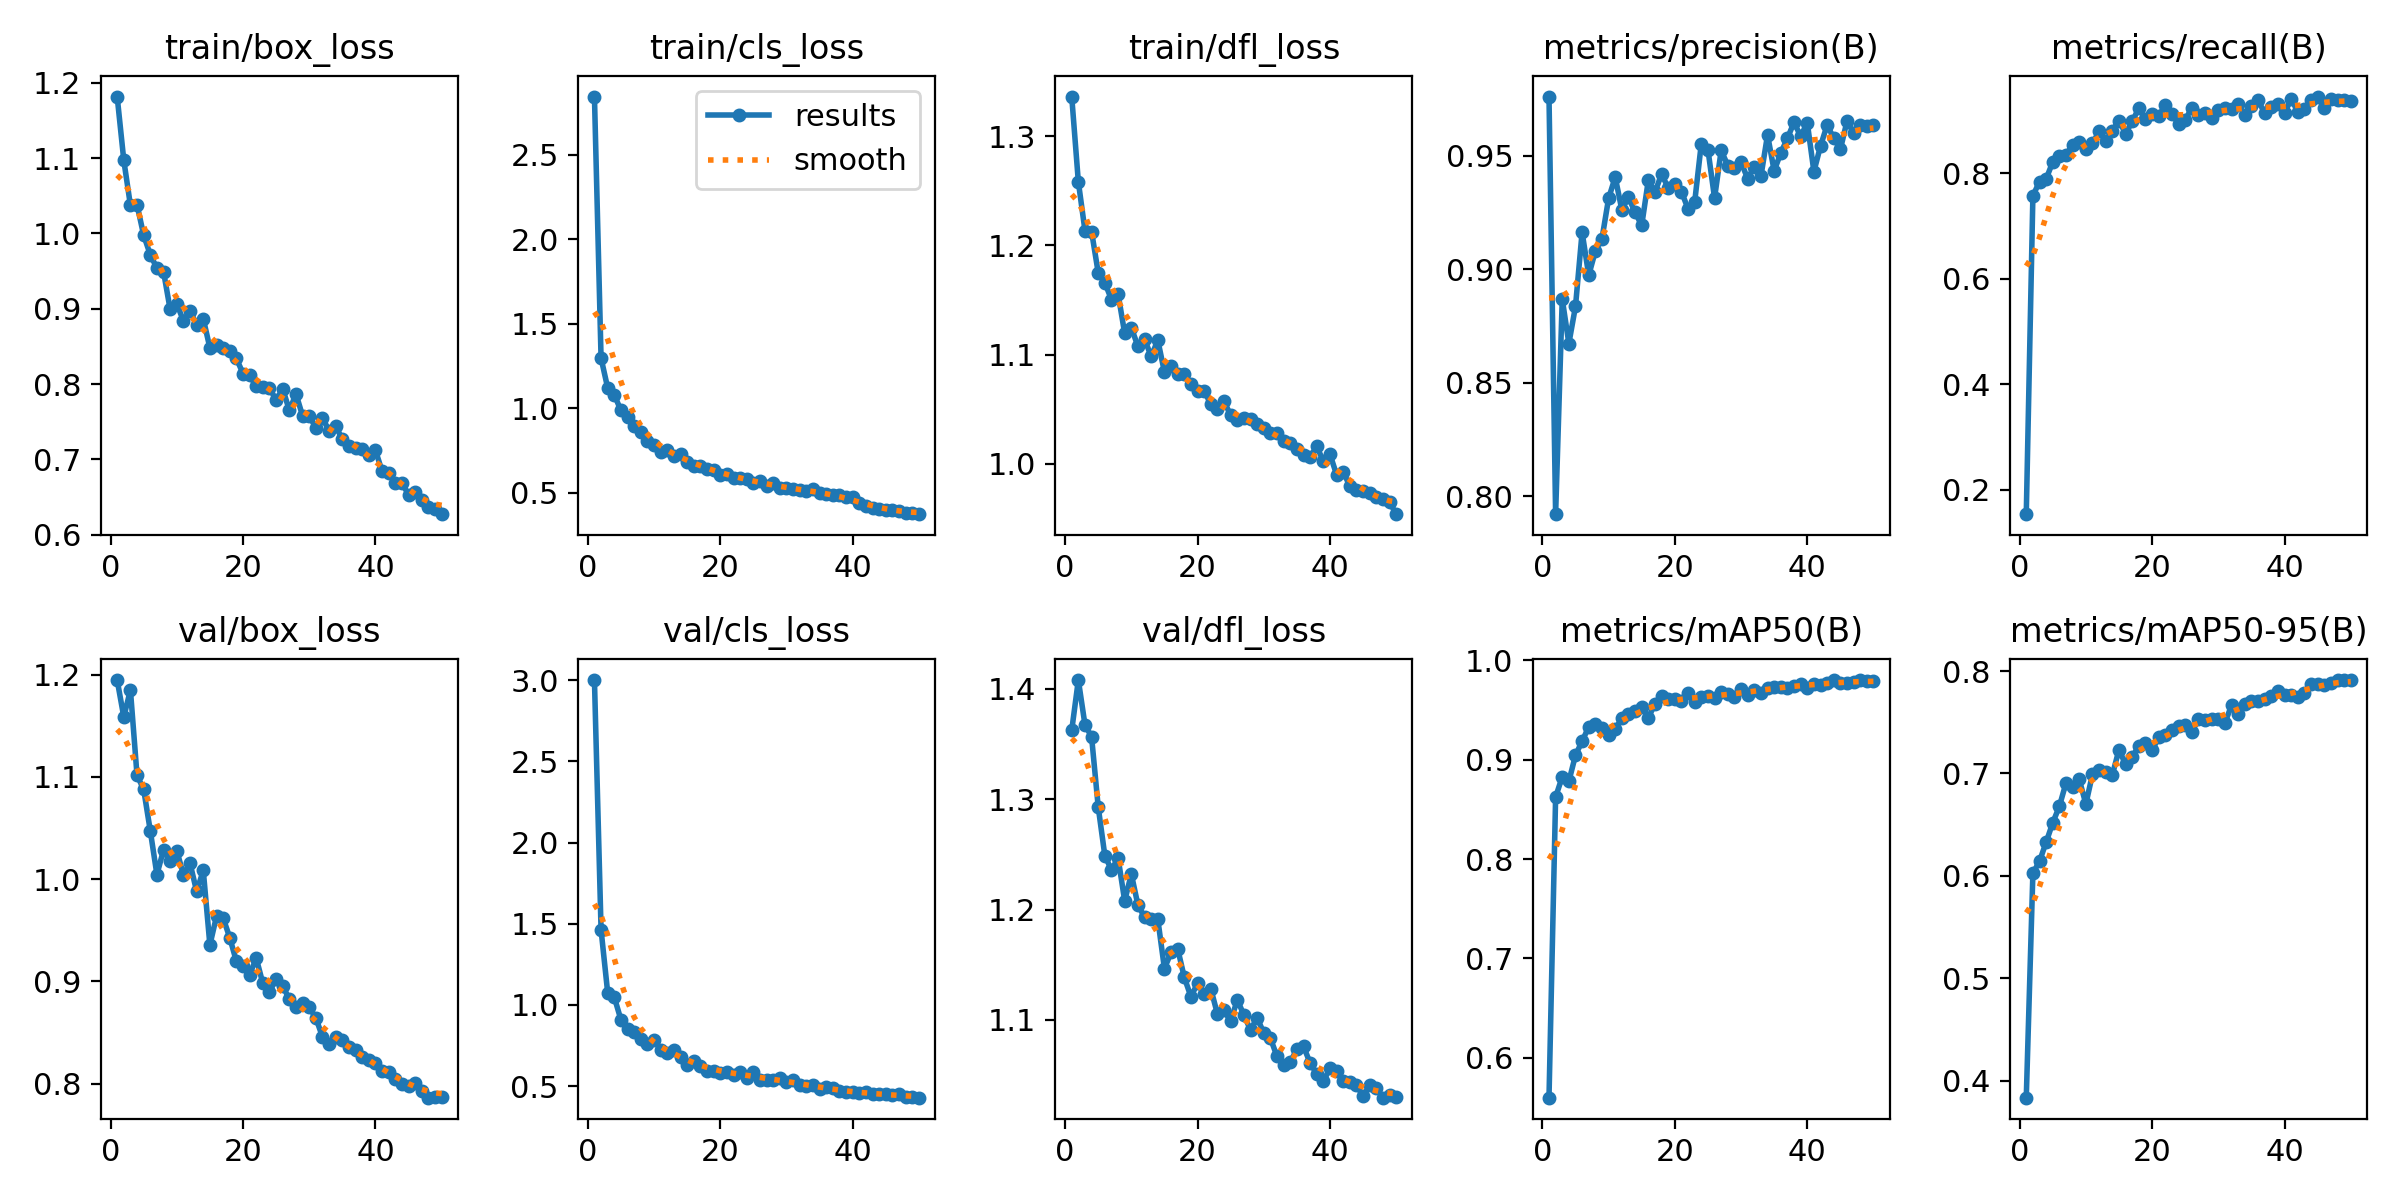

In [21]:
Image("/content/runs/detect/train2/results.png",width=600)

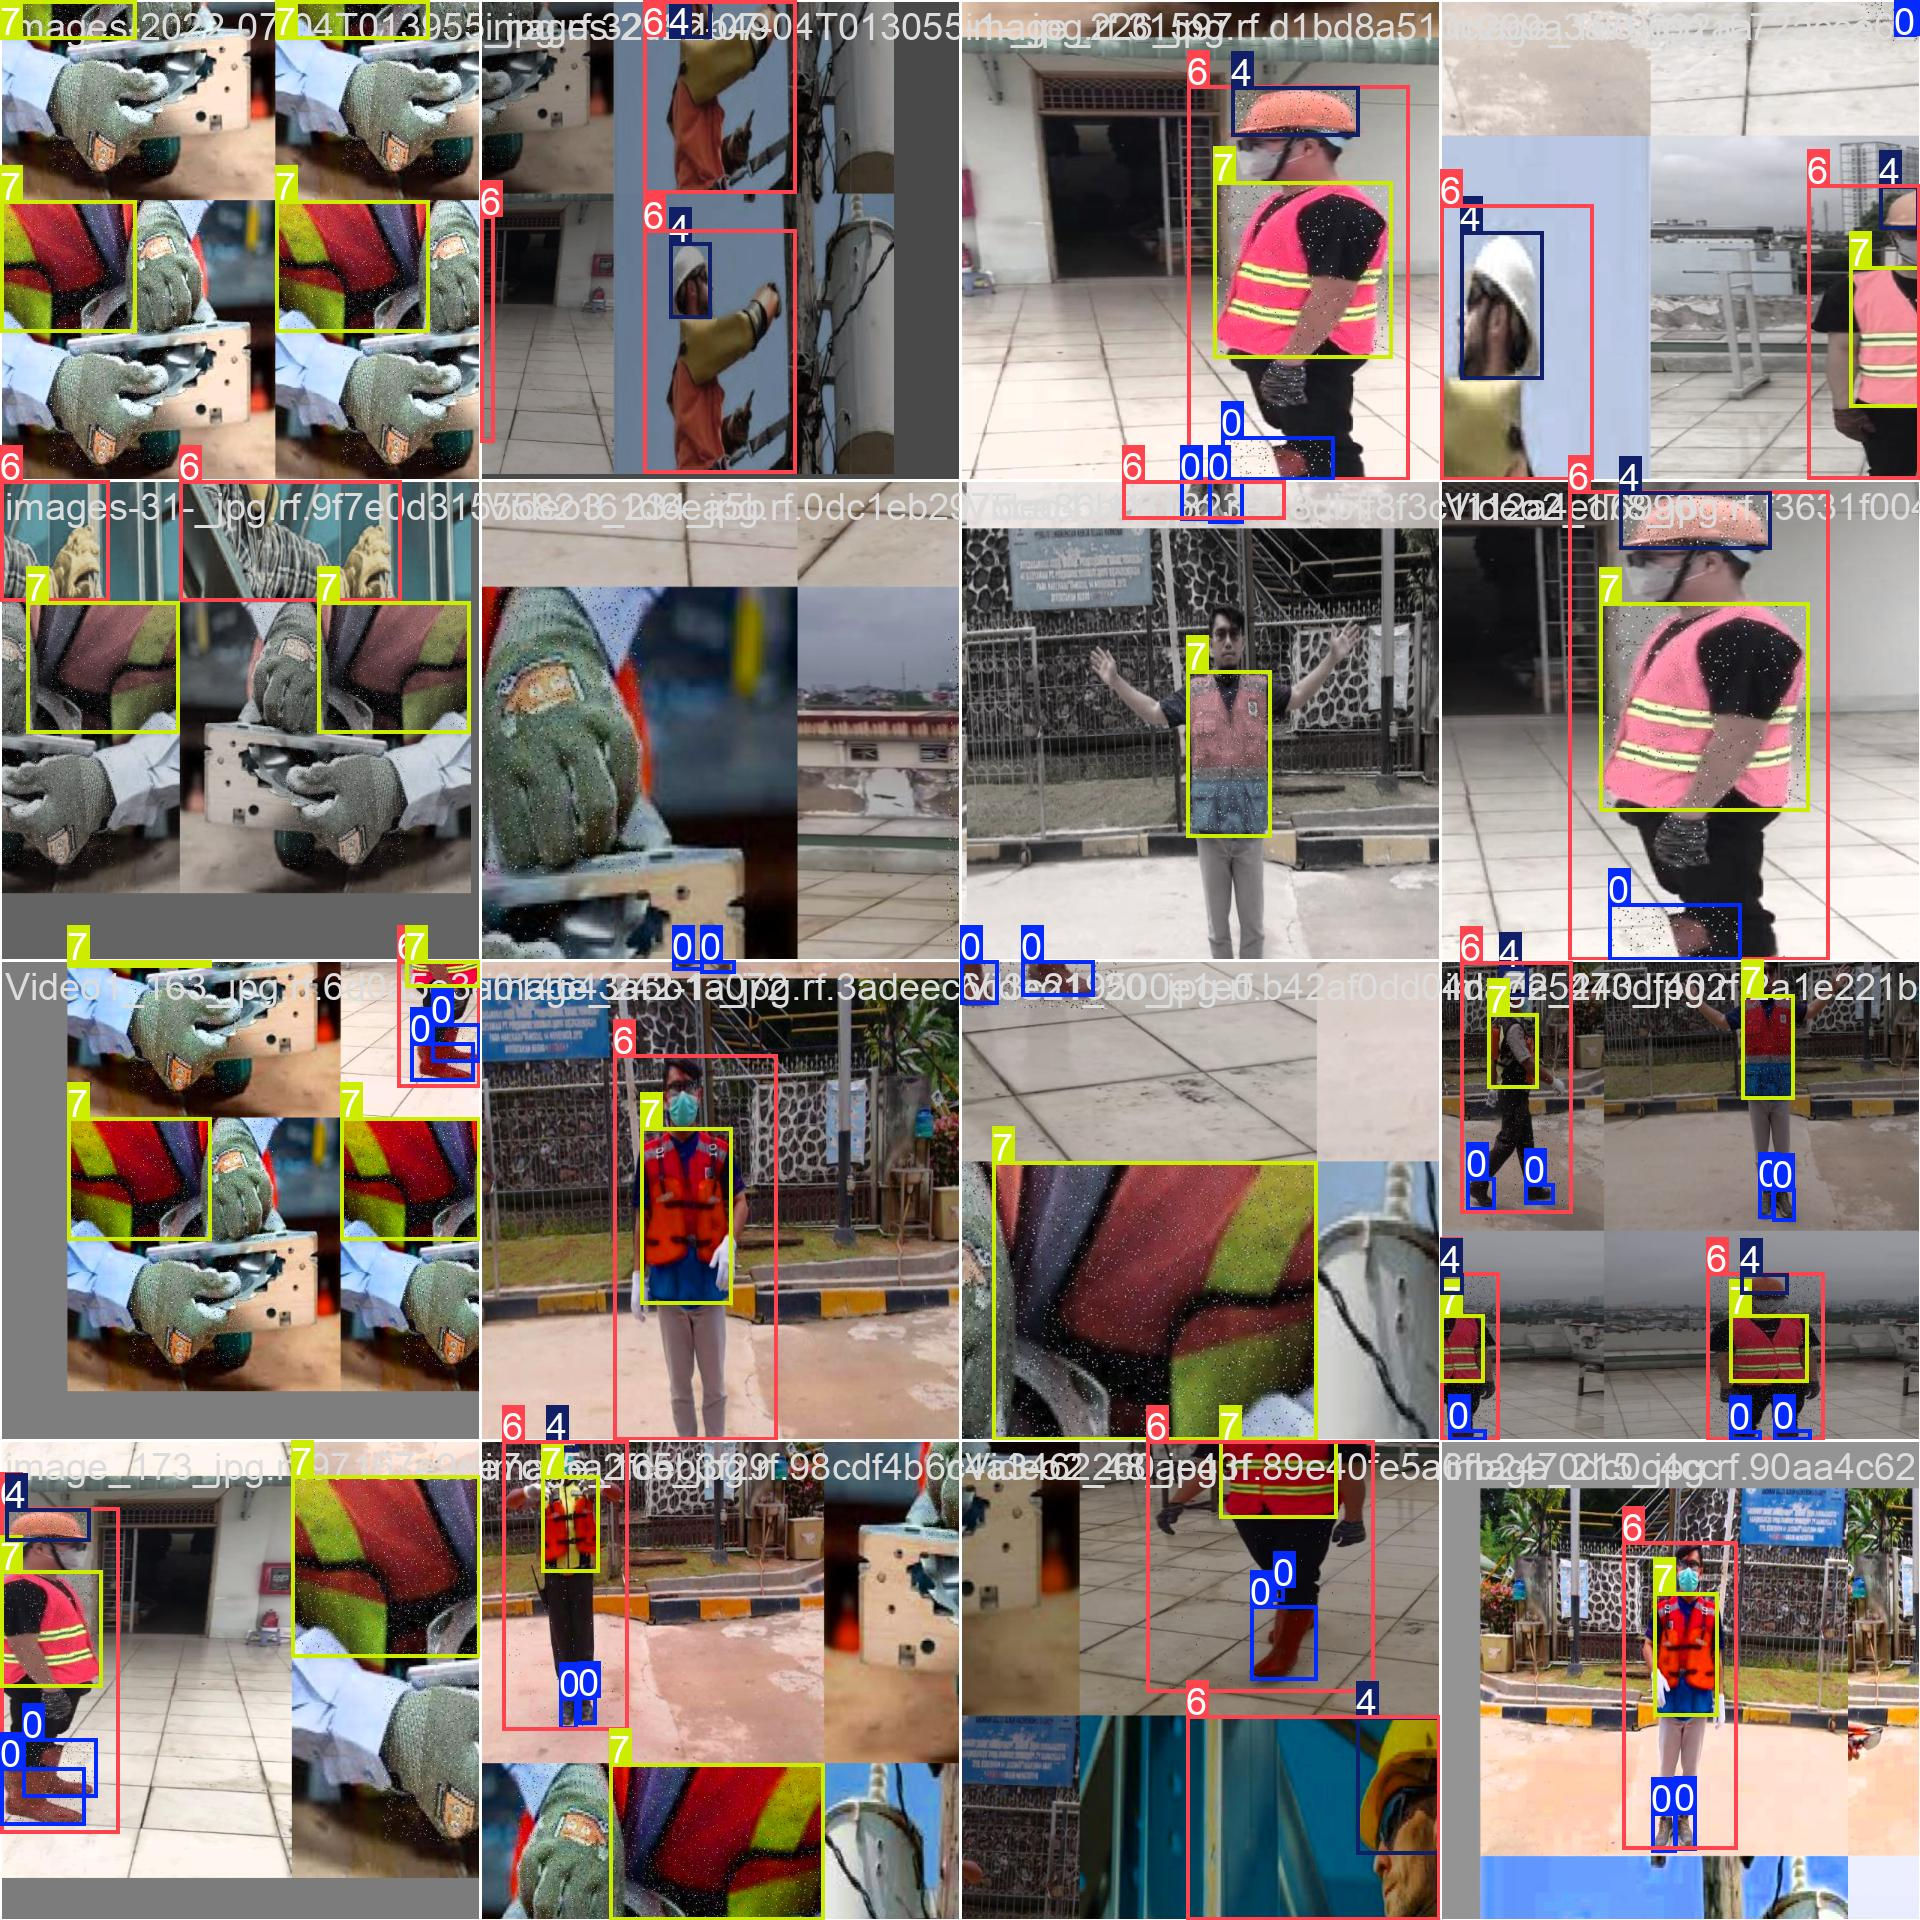

In [22]:
Image("/content/runs/detect/train2/train_batch0.jpg",width=600)

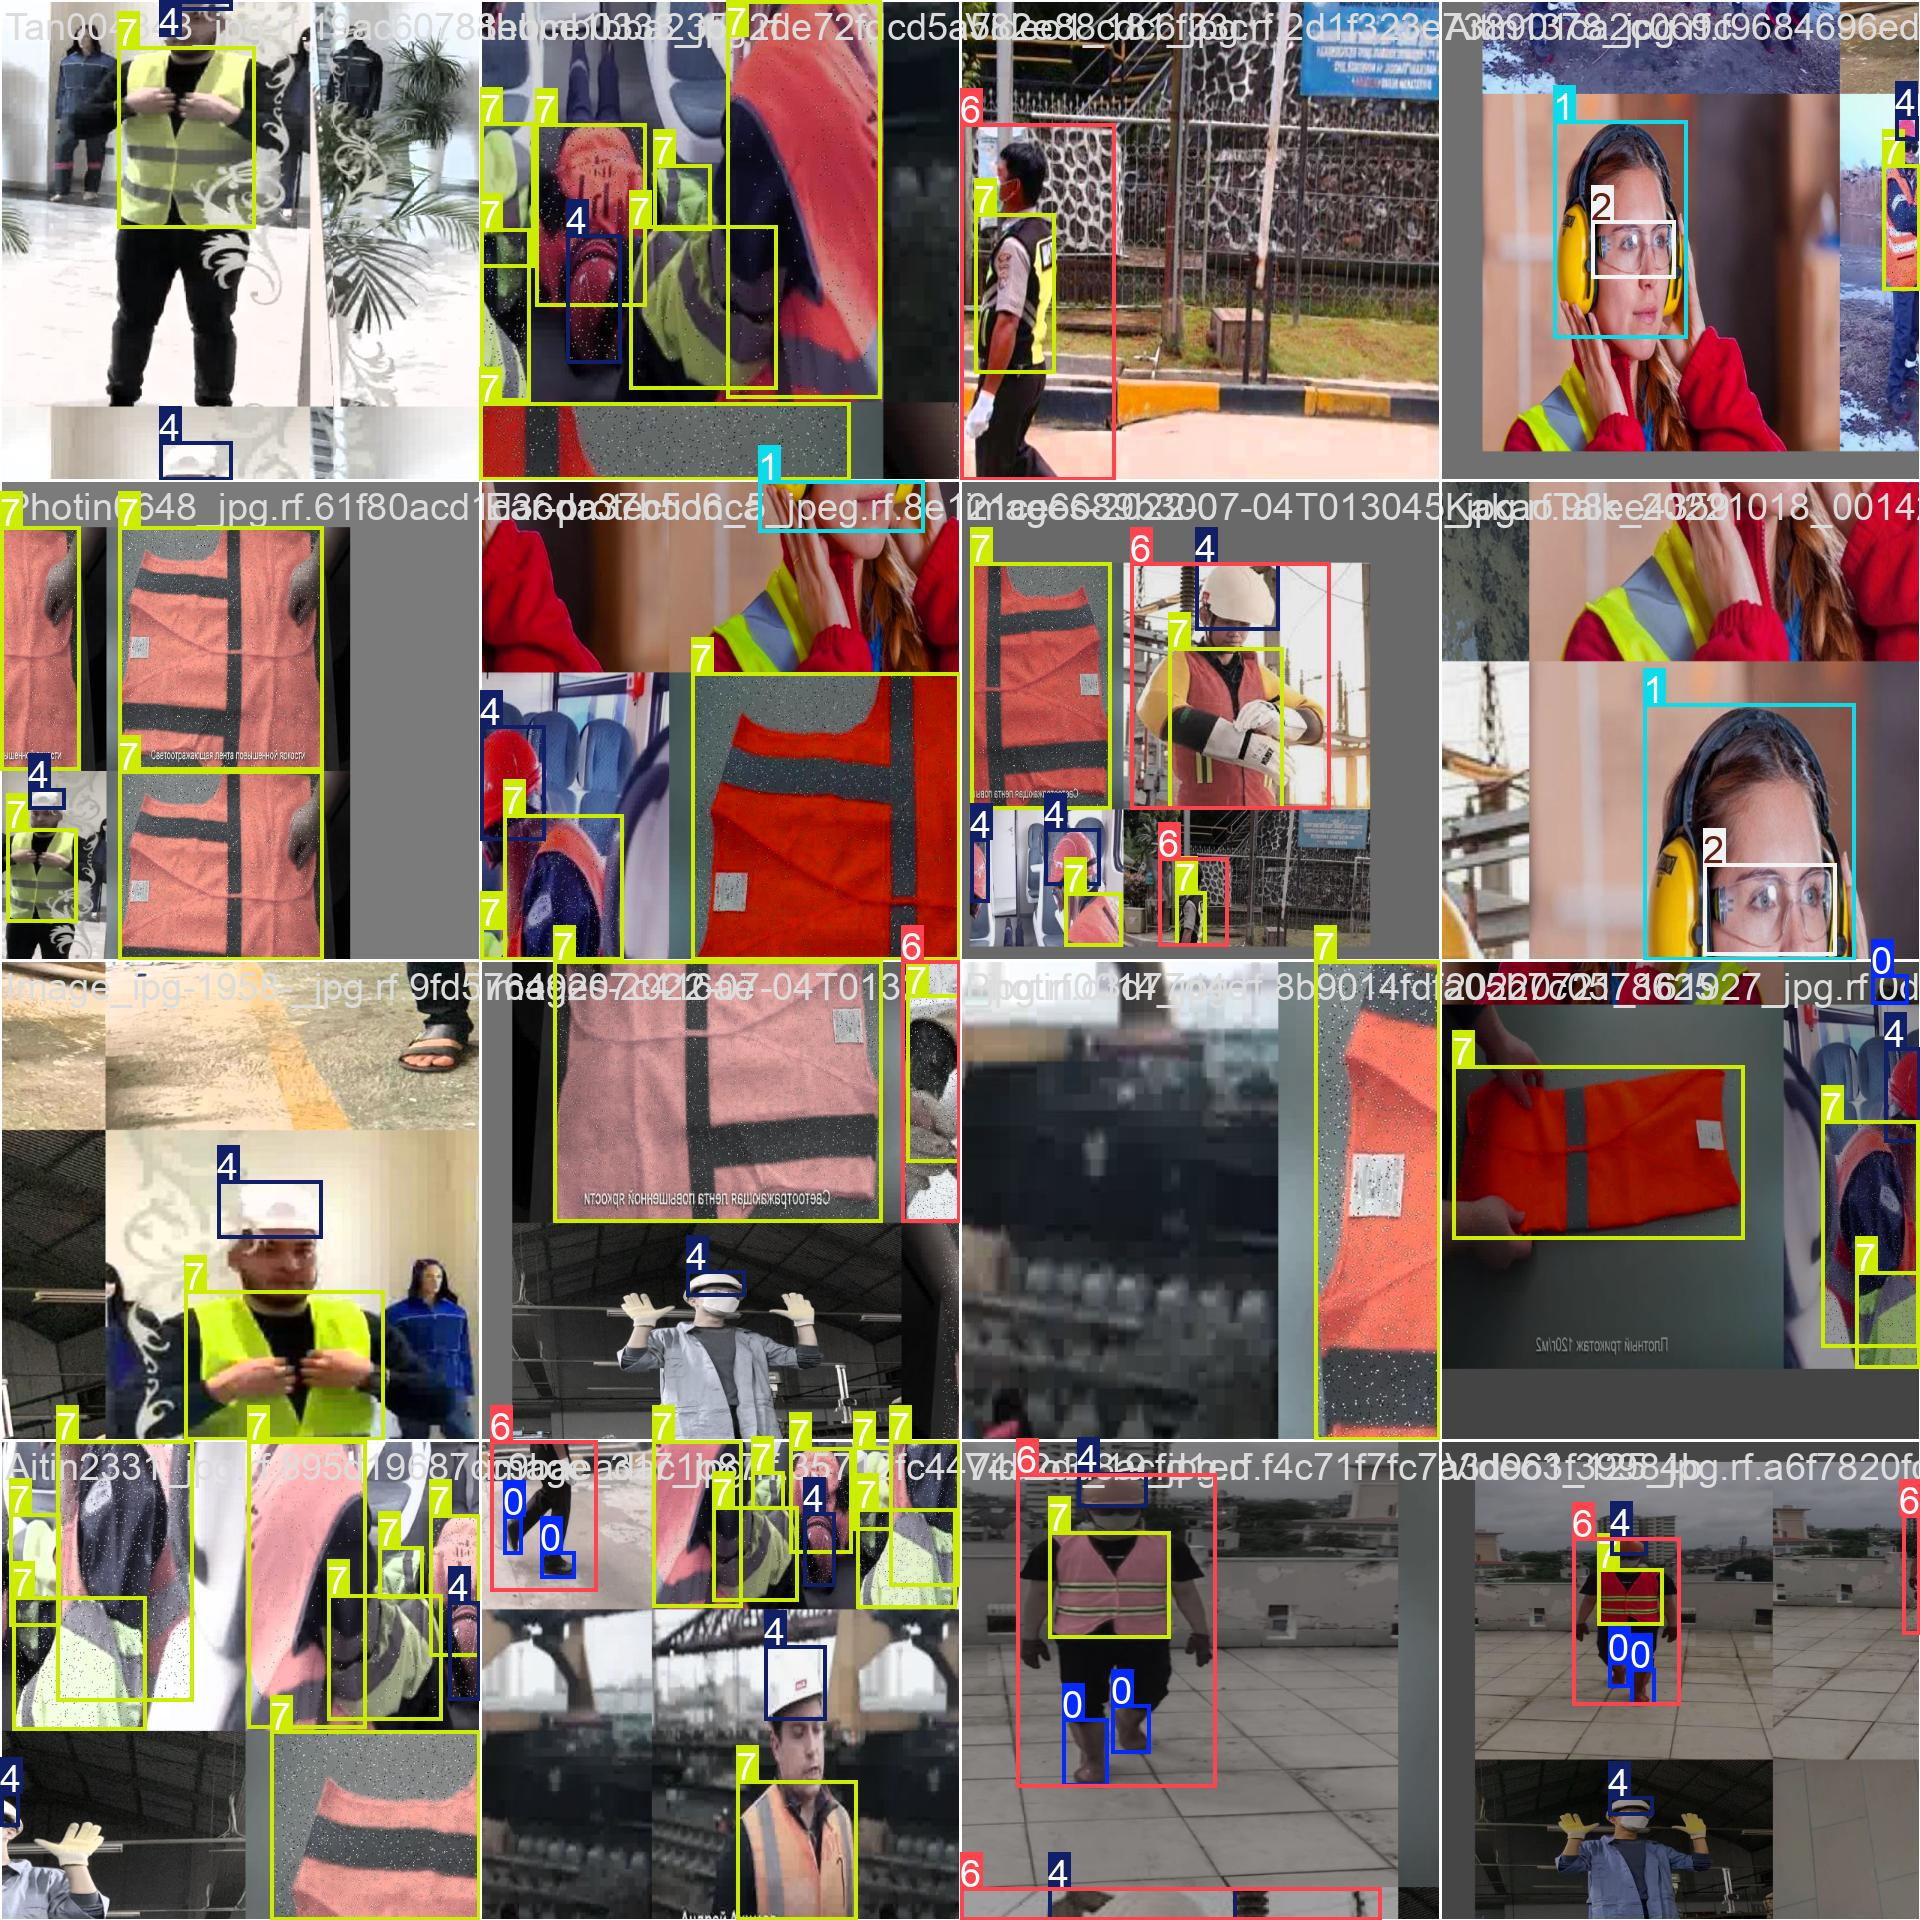

In [23]:
Image("/content/runs/detect/train2/train_batch1.jpg",width=600)

# Validate Fine tune model

In [26]:
!yolo task=detect model='val' model="/content/runs/detect/train2/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1960.6±624.6 MB/s, size: 67.0 KB)
val: Scanning /content/PPE-Dataset-for-Workplace-Safety-2/valid/labels.cache... 326 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 326/326 5.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 21/21 3.9it/s 5.4s
                   all        326       1514      0.963      0.939       0.98      0.792
                 Boots        246        541       0.98      0.897      0.977      0.725
                Helmet        232        273      0.974      0.956      0.977      0.737
                Person        246        302      0.925      0.935      0.977      0.875
                  Vest        307        398      0.974      0.967      0.987       0.83
Speed: 1.5ms preproc

mAP score should be close to 1 and we can see it easily so the model will perform better.

# Inference with Custom Model on Images

In [28]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs

image 1/161 /content/PPE-Dataset-for-Workplace-Safety-2/test/images/00027_jpg.rf.761d147a0fd78a96a2a9c433f6c3d94c.jpg: 640x640 2 Persons, 2 Vests, 11.2ms
image 2/161 /content/PPE-Dataset-for-Workplace-Safety-2/test/images/00037_jpg.rf.bb5a6d427fca94c4ccf448f5877dac83.jpg: 640x640 1 Vest, 9.1ms
image 3/161 /content/PPE-Dataset-for-Workplace-Safety-2/test/images/00048_jpg.rf.d1f7712f99e78643d2517e5c779614b4.jpg: 640x640 3 Helmets, 2 Vests, 17.5ms
image 4/161 /content/PPE-Dataset-for-Workplace-Safety-2/test/images/00103_jpg.rf.59724edbd9ed4cb0bd346a8f2f320c36.jpg: 640x640 1 Helmet, 2 Persons, 2 Vests, 12.1ms
image 5/161 /content/PPE-Dataset-for-Workplace-Safety-2/test/images/00126_jpg.rf.9720e28cc2dafda58394c11615feb774.jpg: 640x640 1 Person, 1 Vest, 12.4ms
image 6/161 /content/PPE-Dataset-for-Workplace-Safety-2/test/images/

In [29]:
import glob

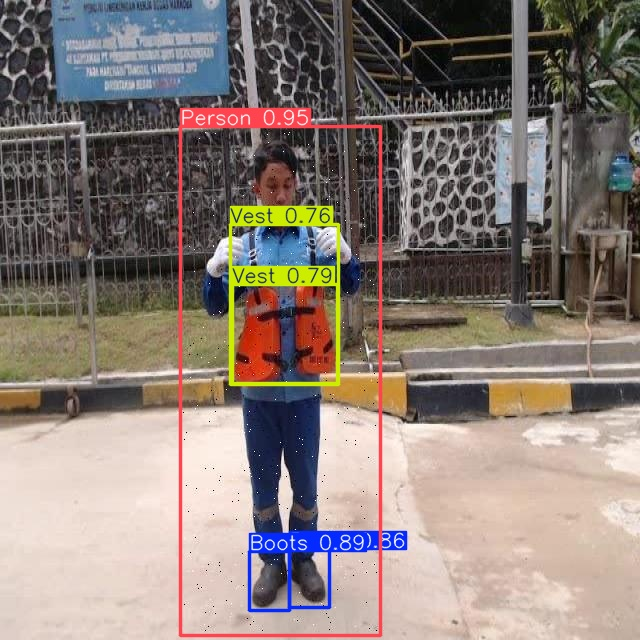

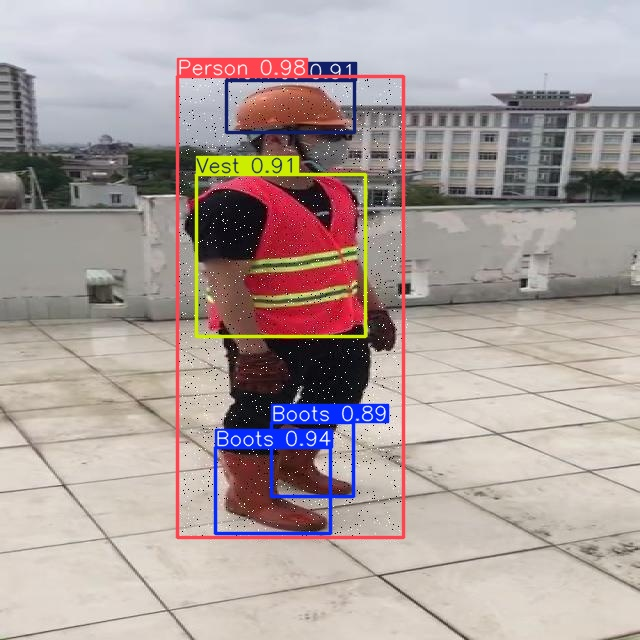

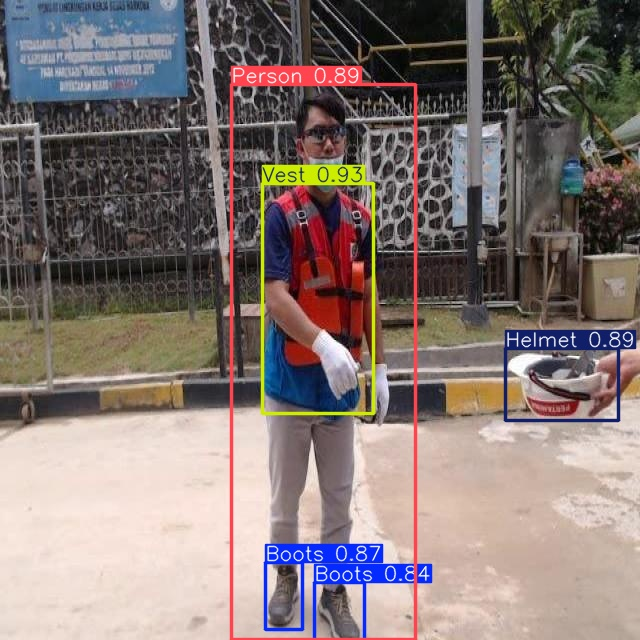

In [31]:
import os
from IPython.display import Image as IPyImage, display

latest_folder=max(glob.glob('/content/runs/detect/predict*/'),key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
  display(IPyImage(filename=img,width=600))
  print("\n")


In [32]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source=subject1.jpg save=True

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/subject1.jpg: 640x448 1 Boots, 11 Helmets, 2 Vests, 71.9ms
Speed: 9.7ms preprocess, 71.9ms inference, 148.8ms postprocess per image at shape (1, 3, 640, 448)
Results saved to /content/runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


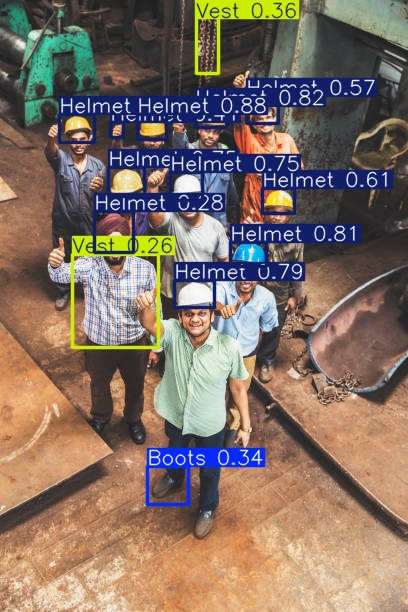

In [33]:
Image("/content/runs/detect/predict2/subject1.jpg",width=600)

# Testing on Video

In [34]:
!yolo task=detect mode=predict model="/content/runs/detect/train2/weights/best.pt" conf=0.25 source=test_video.mp4 save=True

Ultralytics 8.3.203 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,712 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/203) /content/test_video.mp4: 384x640 1 Helmet, 1 Person, 1 Vest, 48.6ms
video 1/1 (frame 2/203) /content/test_video.mp4: 384x640 1 Helmet, 1 Person, 1 Vest, 8.0ms
video 1/1 (frame 3/203) /content/test_video.mp4: 384x640 1 Helmet, 1 Person, 1 Vest, 7.6ms
video 1/1 (frame 4/203) /content/test_video.mp4: 384x640 1 Helmet, 1 Person, 1 Vest, 7.4ms
video 1/1 (frame 5/203) /content/test_video.mp4: 384x640 1 Helmet, 1 Person, 1 Vest, 7.0ms
video 1/1 (frame 6/203) /content/test_video.mp4: 384x640 1 Helmet, 1 Person, 1 Vest, 7.4ms
video 1/1 (frame 7/203) /content/test_video.mp4: 384x640 1 Helmet, 1 Person, 1 Vest, 7.5ms
video 1/1 (frame 8/203) /content/test_video.mp4: 384x640 1 Helmet, 1 Person, 1 Vest, 7.1ms
video 1/1 (frame 9/203) /content/test_video.mp4: 384x640 1 Helmet, 1 Person, 1 Vest, 7.0ms
video 1/1 (fr

In [37]:
from IPython.display import HTML
from base64 import b64encode
import os

save_path="/content/runs/detect/predict3/test_video.avi"

compressed_path="/content/resul.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

#show video
mp4=open(compressed_path,'rb').read()
data_url="data:video/mp4;base64, "+b64encode(mp4).decode()

HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)